**#DATA COLLECTION**

In [ ]:
from google.colab import files
upload=files.upload()
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import os
from datetime import datetime

import pandas as pd
import seaborn as sns
msft=pd.read_csv(r"msft.csv")
msft.head()

,Date,Open,High,Low,Close,Volume,Adj. Close*
0,19-Sep-03,29.76,29.97,29.52,29.96,92433800,29.79
1,18-Sep-03,28.49,29.51,28.42,29.50,67268096,29.34
2,17-Sep-03,28.76,28.95,28.47,28.50,47221600,28.34
3,16-Sep-03,28.41,28.95,28.32,28.90,52060600,28.74
4,15-Sep-03,28.37,28.61,28.33,28.36,41432300,28.20


In [ ]:
#DATA PROCESSING

In [ ]:
msft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         65 non-null     object 
 1   Open         65 non-null     float64
 2   High         65 non-null     float64
 3   Low          65 non-null     float64
 4   Close        65 non-null     float64
 5   Volume       65 non-null     int64  
 6   Adj. Close*  65 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 3.7+ KB


In [ ]:
missing_values = msft.isnull()
print(missing_values)

     Date   Open   High    Low  Close  Volume  Adj. Close*
0   False  False  False  False  False   False        False
1   False  False  False  False  False   False        False
2   False  False  False  False  False   False        False
3   False  False  False  False  False   False        False
4   False  False  False  False  False   False        False
..    ...    ...    ...    ...    ...     ...          ...
60  False  False  False  False  False   False        False
61  False  False  False  False  False   False        False
62  False  False  False  False  False   False        False
63  False  False  False  False  False   False        False
64  False  False  False  False  False   False        False

[65 rows x 7 columns]


In [ ]:
#FEATURE ENGINEERING

In [ ]:
#Moving Average
import pandas as pd

# Assuming you have a DataFrame 'df' with a 'Close' column
msft['MA_10'] = msft['Close'].rolling(window=10).mean()
msft['MA_50'] = msft['Close'].rolling(window=50).mean()

#Here, MA_10 represents a 10-day moving average, and MA_50 represents a 50-day moving average.


In [ ]:
print(msft['MA_10'])

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
       ...  
60    26.440
61    26.263
62    26.071
63    25.962
64    25.919
Name: MA_10, Length: 65, dtype: float64


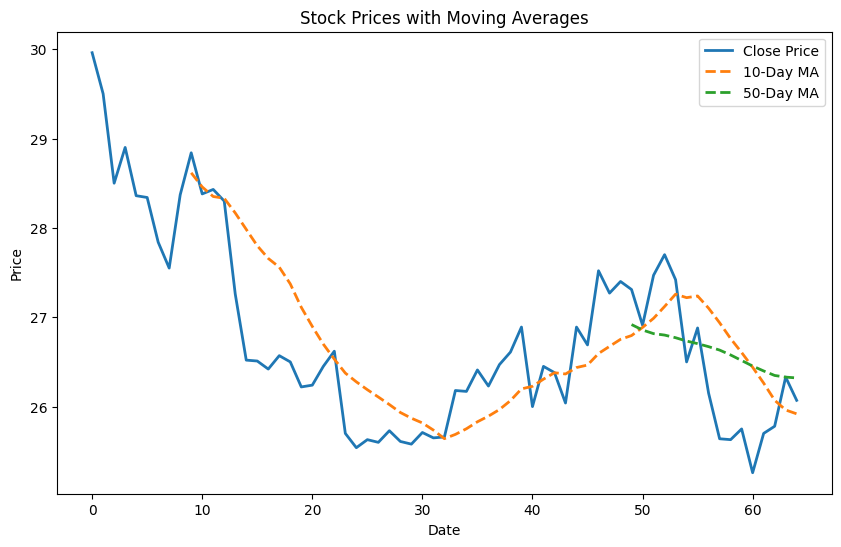

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with a 'Close' column
# ... (your data loading and manipulation here)

# Calculate moving averages
msft['MA_10'] = msft['Close'].rolling(window=10).mean()
msft['MA_50'] = msft['Close'].rolling(window=50).mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(msft['Close'], label='Close Price', linewidth=2)
plt.plot(msft['MA_10'], label='10-Day MA', linestyle='--', linewidth=2)
plt.plot(msft['MA_50'], label='50-Day MA', linestyle='--', linewidth=2)

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Prices with Moving Averages')

# Adding legend
plt.legend()

# Display the plot
plt.show()


In [ ]:
#Technical Indicators

# Calculate daily price changes
msft['Price Change'] = msft['Close'].diff()

# Calculate average gains and losses over a specified period (e.g., 14 days)
gains = msft['Price Change'].apply(lambda x: x if x > 0 else 0).rolling(window=14).mean()
losses = -msft['Price Change'].apply(lambda x: x if x < 0 else 0).rolling(window=14).mean()

# Calculate Relative Strength (RS) and Relative Strength Index (RSI)
rs = gains / losses
msft['RSI'] = 100 - (100 / (1 + rs))


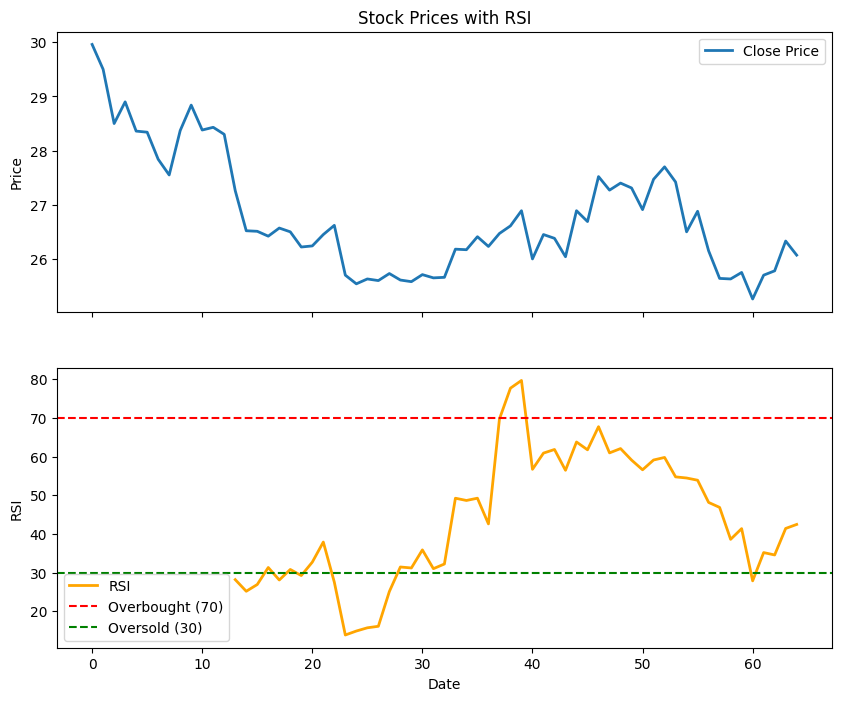

In [ ]:
# Plotting
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(10, 8))

# Plotting the closing prices
ax1.plot(msft['Close'], label='Close Price', linewidth=2)
ax1.set_ylabel('Price')
ax1.set_title('Stock Prices with RSI')

# Plotting the RSI
ax2.plot(msft['RSI'], label='RSI', color='orange', linewidth=2)
ax2.axhline(y=70, color='r', linestyle='--', label='Overbought (70)')
ax2.axhline(y=30, color='g', linestyle='--', label='Oversold (30)')
ax2.set_xlabel('Date')
ax2.set_ylabel('RSI')

# Adding legend
ax1.legend()
ax2.legend()

# Display the plot
plt.show()

In [ ]:
#Model Selection

In [ ]:
import pandas as pd

msft = pd.DataFrame(msft, columns=['Date'])

# Convert the entire 'Date' column to datetime format
msft['Date'] = pd.to_datetime(msft['Date'], format='%d-%b-%y')

# Display the DataFrame with the converted 'Date' column
print(msft)


         Date
0  2003-09-19
1  2003-09-18
2  2003-09-17
3  2003-09-16
4  2003-09-15
..        ...
60 2003-06-25
61 2003-06-24
62 2003-06-23
63 2003-06-20
64 2003-06-19

[65 rows x 1 columns]


In [ ]:
#Model Training

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming 'X' is your feature matrix and 'y' is your target variable
# Replace this with your actual preprocessed feature matrix and target variable
# In this example, I assume that 'Close' is your target variable, and other columns are features.
X = msft[['Close','Open']] # Assuming 'Close' is the target variable
y = msft['Volume']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model (replace this with your chosen model)
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')

# Optionally, you can save the trained model for future use
# For example, if using a scikit-learn model:
# from joblib import dump
# dump(model, 'trained_model.joblib')


Mean Squared Error on Test Set: 452949994119877.25


In [ ]:
#Evaluation

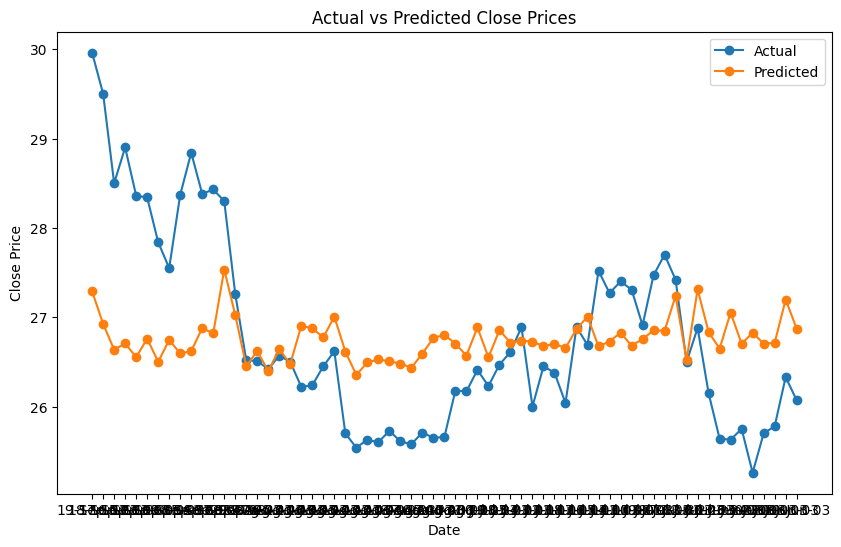

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


X = msft['Volume'].values.reshape(-1, 1)
y = msft['Close'].values
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model (replace this with your chosen model)
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the entire dataset
y_pred = model.predict(X)

# Align 'Date' and 'Close' arrays
dates = msft['Date']
num_dates = len(dates)

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(dates[:num_dates], y[:num_dates], label='Actual', marker='o')
plt.plot(dates[:num_dates], y_pred[:num_dates], label='Predicted', marker='o')
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()
